# Spaceship Titanic: Data Preprocessing

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Overview

In [2]:
df = pd.read_csv('./data/train_raw.csv')

In [3]:
df.shape

(8693, 14)

In [4]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Analyzing features

In [5]:
FEATS = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name']

In [6]:
df[FEATS].select_dtypes(include='object').describe().T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


As we can see there are a few features that should be removed because of too much variety. These are: ***PassengerId***, ***Cabin***, ***Name***.

In [7]:
df[FEATS].select_dtypes(include=['int', 'float']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
df[FEATS].isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [9]:
df[FEATS].isna().any(axis=1).sum()

2087

## Elemination of NaNs

### Handling Continuous Features NaNs

In [10]:
CONTINUOUS = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [11]:
df[CONTINUOUS].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [12]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
df[CONTINUOUS] = si.fit_transform(df[CONTINUOUS])

In [14]:
df[CONTINUOUS].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.827930,14.339054,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,224.687617,659.739364,0.0,0.0,0.0,78.0,14327.0
FoodCourt,8693.0,458.077203,1594.434978,0.0,0.0,0.0,118.0,29813.0
ShoppingMall,8693.0,173.729169,597.417440,0.0,0.0,0.0,45.0,23492.0
Spa,8693.0,311.138778,1124.675871,0.0,0.0,0.0,89.0,22408.0
VRDeck,8693.0,304.854791,1133.259049,0.0,0.0,0.0,71.0,24133.0


### Handling Categorical Features NaNs

In [15]:
CATEGORICAL = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [16]:
df[CATEGORICAL].describe().T

,count,unique,top,freq
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291


In [17]:
df[CATEGORICAL].head()

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,TRAPPIST-1e,False
1,Earth,False,TRAPPIST-1e,False
2,Europa,False,TRAPPIST-1e,True
3,Europa,False,TRAPPIST-1e,False
4,Earth,False,TRAPPIST-1e,False


#### Home Planet

In [18]:
df['HomePlanet'].isna().sum()

201

In [19]:
df['HomePlanet'].fillna('None', inplace=True)

C:\Users\mike3\AppData\Local\Temp\ipykernel_21464\2415731872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HomePlanet'].fillna('None', inplace=True)


In [20]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
None       201
Name: count, dtype: int64

In [21]:
HOME_PLANETS = ['Earth', 'Europa', 'Mars', 'None']

In [22]:
counts = df.groupby(['HomePlanet', 'Transported']).size().unstack(fill_value=0)
counts.columns = ['0s', '1s']

In [23]:
counts['1s'] / (counts['0s'] + counts['1s']) # The precentage of transported people to other dimension

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
None      0.512438
dtype: float64

Basing on the shown information we can say that there is no specific relation ship between the target variable and the analyzed feature. That's why we want to applay the ***one hot encoding***.

In [24]:
df = pd.get_dummies(df, columns=['HomePlanet'])
df.drop(columns=['HomePlanet_None'], inplace=True)

In [25]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars'],
      dtype='object')

#### CryoSleep

In [26]:
df['CryoSleep'].isna().sum()

217

In [27]:
df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

It's a boolean type of value. We will encode False as 0 and True as 1 because of that. To handle the NaNs we will encode them as -1. This is meant to show the lack of data to the model.

In [28]:
df['CryoSleep'] = df['CryoSleep'].map({np.NaN: -1, False: 0, True: 1}).astype(int)

#### Destination

In [29]:
df['Destination'].isna().sum()

182

In [30]:
df['Destination'].fillna('Unknown', inplace=True)

C:\Users\mike3\AppData\Local\Temp\ipykernel_21464\3866664133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Destination'].fillna('Unknown', inplace=True)


In [31]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Unknown           182
Name: count, dtype: int64

In [32]:
counts = df.groupby(['Destination', 'Transported']).size().unstack(fill_value=0)
counts.columns = ['0s', '1s']

In [33]:
counts['1s'] / (counts['0s'] + counts['1s']) # The precentage of transported people to other dimension

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Unknown          0.505495
dtype: float64

We decided to use the ***one hot encoding*** on the column because of the shown above precentages of transported people. There is no linear relationship between feature values and the target variable.

In [34]:
df = pd.get_dummies(df, columns=['Destination'])
df.drop(columns=['Destination_Unknown'], inplace=True)

In [35]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')

#### VIP

In [36]:
df['VIP'].isna().sum()

203

In [37]:
df['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

There isn't much variety in this feature. We want to remove it from dataset.

## Analyzing the correlations

In [38]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')

In [39]:
FEATS = ['CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Transported']

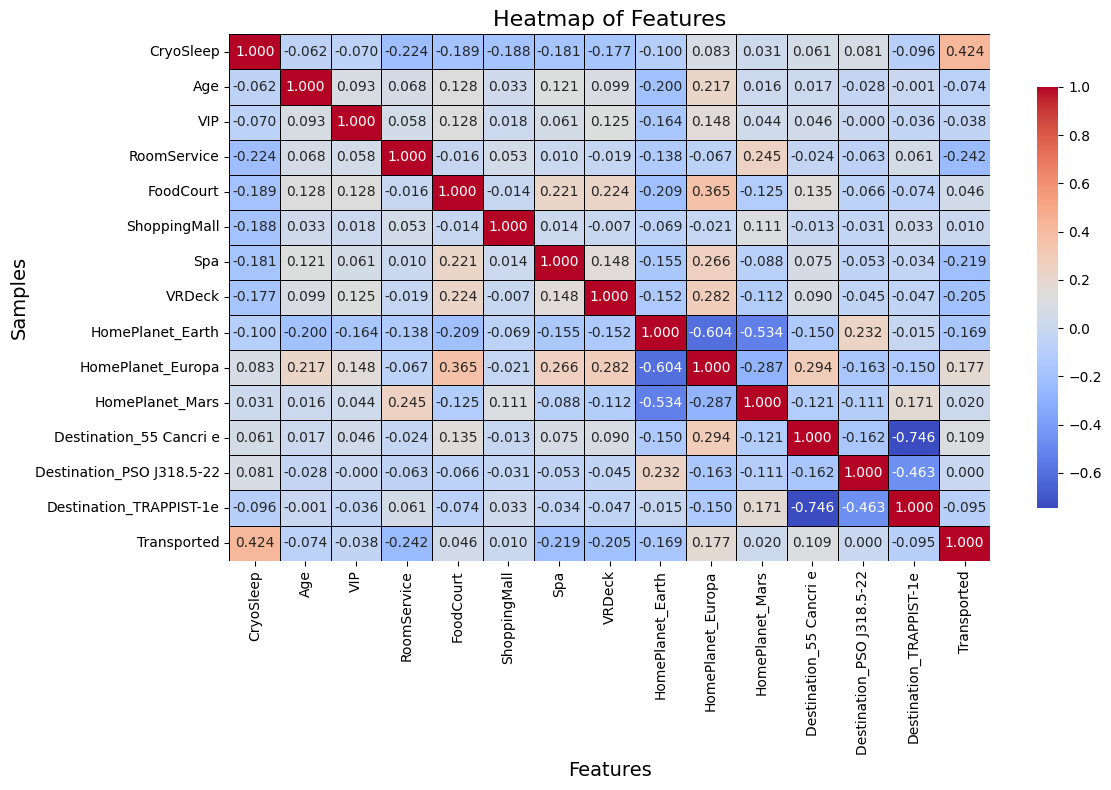

In [40]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
ax = sns.heatmap(df[FEATS].corr(), annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5, linecolor='black', cbar_kws={'shrink': .8})

# Customize the appearance
ax.set_title('Heatmap of Features', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Samples', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


After analyzing the heatmap of features, we can surely say that ***Age***, ***FoodCourt*** and ***ShoppingMall*** have no impact on the Transported column.

## Feature Selection

In [41]:
FEATS_TO_DROP = ['PassengerId', 'Cabin', 'Name', 'Age', 'FoodCourt', 'ShoppingMall', 'VIP']

In [42]:
df.drop(columns=FEATS_TO_DROP, inplace=True)

In [43]:
df

,CryoSleep,RoomService,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.0,0.0,0.0,False,False,True,False,False,False,True
1,0,109.0,549.0,44.0,True,True,False,False,False,False,True
2,0,43.0,6715.0,49.0,False,False,True,False,False,False,True
3,0,0.0,3329.0,193.0,False,False,True,False,False,False,True
4,0,303.0,565.0,2.0,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.0,1643.0,74.0,False,False,True,False,True,False,False
8689,1,0.0,0.0,0.0,False,True,False,False,False,True,False
8690,0,0.0,1.0,0.0,True,True,False,False,False,False,True
8691,0,0.0,353.0,3235.0,False,False,True,False,True,False,False


## Transforming features

### Casting from boolean to integer

In [46]:
df[df.select_dtypes(bool).columns] = df[df.select_dtypes(bool).columns].astype(int)

In [47]:
df.head()

,CryoSleep,RoomService,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0,109.0,549.0,44.0,1,1,0,0,0,0,1
2,0,43.0,6715.0,49.0,0,0,1,0,0,0,1
3,0,0.0,3329.0,193.0,0,0,1,0,0,0,1
4,0,303.0,565.0,2.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.0,1643.0,74.0,0,0,1,0,1,0,0
8689,1,0.0,0.0,0.0,0,1,0,0,0,1,0
8690,0,0.0,1.0,0.0,1,1,0,0,0,0,1
8691,0,0.0,353.0,3235.0,0,0,1,0,1,0,0
